In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('/Users/tanishrajput/Desktop/Projects/Diabetic  Retinopathy/Dataset/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('/Users/tanishrajput/Desktop/Projects/Diabetic  Retinopathy/Dataset/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [5]:
!pip install -q efficientnet

/Users/tanishrajput/.zshenv:1: bad assignment


In [6]:
import efficientnet.tfkeras as efn

In [9]:
# Defining the learning rate scheduler
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [10]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])
    
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])

In [12]:
history=model.fit(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=40,verbose=1)

Epoch 1/40


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - acc: 0.5880 - loss: 1.2215 - val_acc: 0.5759 - val_loss: 1.1205 - learning_rate: 1.0000e-04
Epoch 2/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - acc: 0.7241 - loss: 0.7599 - val_acc: 0.6607 - val_loss: 0.9685 - learning_rate: 1.0000e-04
Epoch 3/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - acc: 0.7477 - loss: 0.6829 - val_acc: 0.7114 - val_loss: 0.7788 - learning_rate: 1.0000e-04
Epoch 4/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - acc: 0.7865 - loss: 0.5736 - val_acc: 0.7579 - val_loss: 0.7447 - learning_rate: 1.0000e-04
Epoch 5/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - acc: 0.7824 - loss: 0.5682 - val_acc: 0.7893 - val_loss: 0.5823 - learning_rate: 1.0000e-04
Epoch 6/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - acc: 0.8023 - loss: 0.5170 - val_acc: 0.7825 - val_loss: 0.6131 - learning_rate: 1.0000e-04
Epoch 7/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - acc: 0.8120 - loss: 0.5064 - val_acc: 0.7661 - val_loss: 0.6331 - learning_rate: 1.0000e

In [13]:
import matplotlib.pyplot as plt

In [14]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

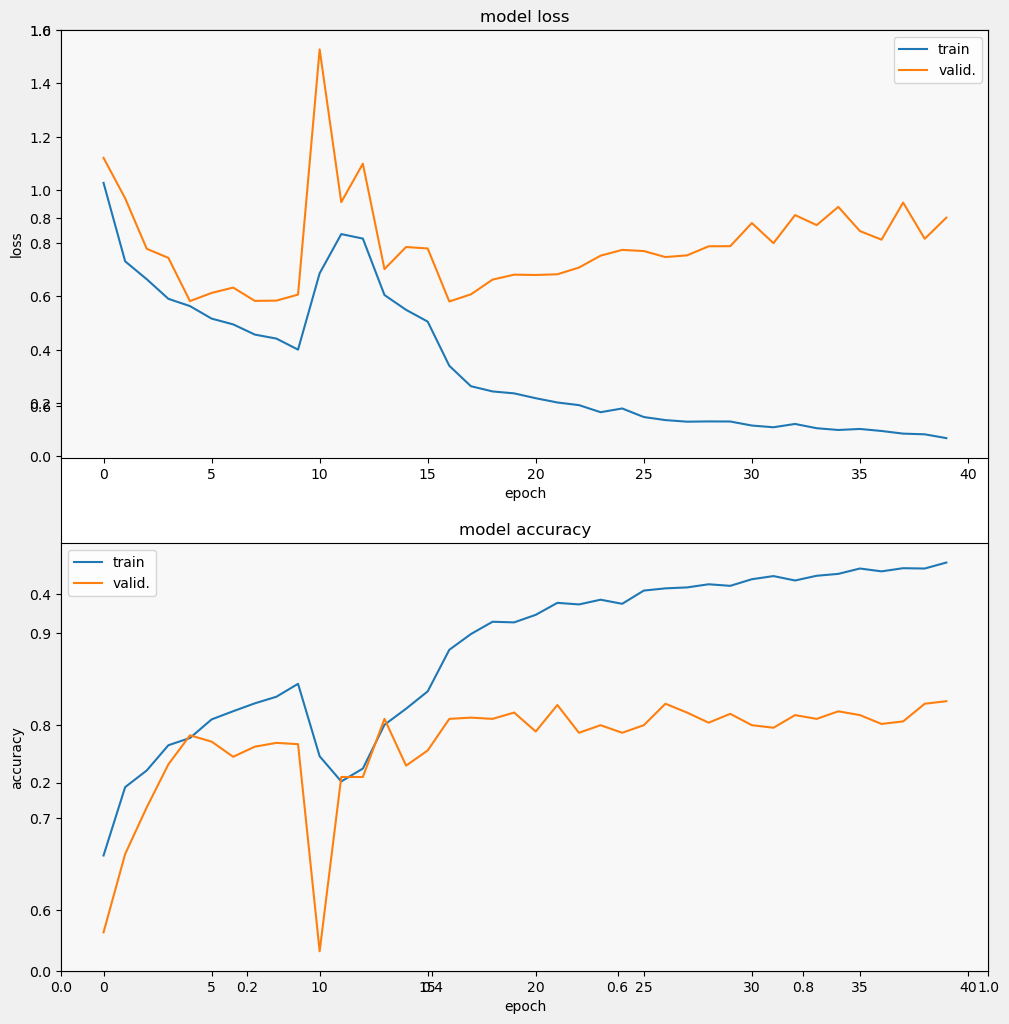

In [15]:
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    history.history['acc'], 
    history.history['val_acc'], 
    'accuracy', 212)

In [16]:
# Save the model as a .h5 file
model.save('model.h5')

In [25]:
test_dir = '/Users/tanishrajput/Desktop/Projects/Diabetic  Retinopathy/Dataset/gaussian_filtered_images'

In [26]:
# Step 3: Create ImageDataGenerators for training and testing
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values

In [27]:
# Step 4: Load images from directories
test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Resize images to match model input size
    batch_size=32,           # Adjust according to your preference
    class_mode='categorical' # Use 'categorical' for multi-class classification
)

Found 3662 images belonging to 5 classes.


In [28]:
# Step 7: Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_generator) 
print(f"Test Accuracy: {test_acc*100:.2f}%")

115/115 ━━━━━━━━━━━━━━━━━━━━ 28s 242ms/step - acc: 0.9505 - loss: 0.2844
Test Accuracy: 94.81%
